In [104]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 


Using matplotlib backend: TkAgg


In [105]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [106]:
from IPython.display import HTML
style = "<style>svg{width:50% !important;height: 50% !important;}</style>"
HTML(style)

In [107]:
titanic_data = pd.read_csv("../datasets/titanic/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
male = X['Sex'] == 'male'
female = X['Sex'] != 'male'
X.loc[male, 'Age'] = X.loc[male, 'Age'].fillna(X.loc[male, 'Age'].median())
X.loc[female, 'Age'] = X.loc[female, 'Age'].fillna(X.loc[female, 'Age'].median())

In [110]:
y = titanic_data.Survived

In [111]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [114]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [115]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
clf.score(X_train, y_train)

0.8238255033557047

In [117]:
clf.score(X_test, y_test)

0.8203389830508474

In [118]:
max_depth_values = range(1, 100)

In [119]:
scores_data = pd.DataFrame()

In [120]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [121]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.785261
0,5,0.842282,0.810169,0.795247


In [128]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name ='set_type', value_name='score')

In [132]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.785261
202,5,cross_val_score,0.795247
203,6,cross_val_score,0.795374
204,7,cross_val_score,0.796984
205,8,cross_val_score,0.793566
206,9,cross_val_score,0.796927
207,10,cross_val_score,0.795274


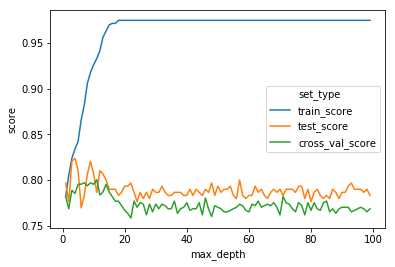

In [130]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [133]:
from sklearn.model_selection import cross_val_score

In [135]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [136]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7864406779661017